# Main Analysis


In [1]:
from pathlib import *
import csv
import sqlalchemy as sa
import numpy as np
import pandas as pd
import axelrod as axl
import random
import matplotlib.pyplot as plt
%matplotlib inline

Size of Database as of writing: 

In [3]:
path_for_images = Path("../../images/folk_thm/main_analysis/")
path_for_images.mkdir(parents=True, exist_ok=True)

database_management_sys = sa.create_engine("sqlite:///../database_code/data/se/main.db")
connect_dbms_to_db = database_management_sys.connect()
se_folk_thm_data = pd.read_sql("folk_theorem_experiment", connect_dbms_to_db)
len(se_folk_thm_data), max(se_folk_thm_data["tournament_player_set"])


(825700, 159)

## p-Thresholds


Looking at the probabilities of the game ending for all the games (ignoring whether the games are degenerate or not)

In [15]:
p_thresh_data = pd.read_csv("..\database_code\data\prob_end_threshold\main.csv")
p_thresh_data.head(), len(p_thresh_data)


(   number_of_players  tournament_player_set  noise  min_p_threshold  \
 0                  2                      0    0.0         0.293343   
 1                  2                      0    0.1         0.182455   
 2                  2                      0    0.2         0.051404   
 3                  2                      0    0.3         0.001000   
 4                  2                      0    0.4         0.001000   
 
    mean_p_threshold  median_p_threshold  max_p_threshold  possible_degeneracy  
 0          0.293343            0.293343         0.293343                False  
 1          0.182455            0.182455         0.182455                False  
 2          0.088367            0.091727         0.121970                False  
 3          0.001000            0.001000         0.001000                False  
 4          0.001000            0.001000         0.001000                False  ,
 1754)

In [16]:
p_thresh_data.dtypes

number_of_players          int64
tournament_player_set      int64
noise                    float64
min_p_threshold          float64
mean_p_threshold         float64
median_p_threshold       float64
max_p_threshold          float64
possible_degeneracy         bool
dtype: object

In [17]:
p_thresh_drop_na = p_thresh_data.dropna()

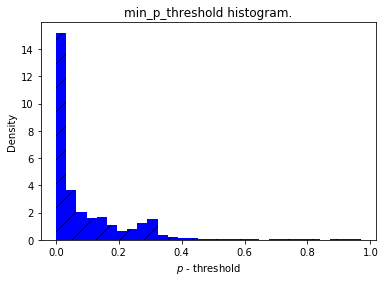

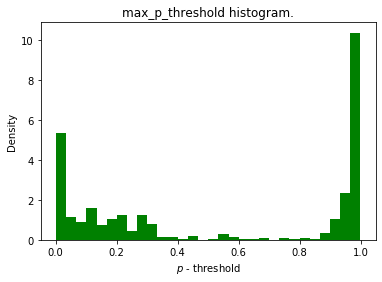

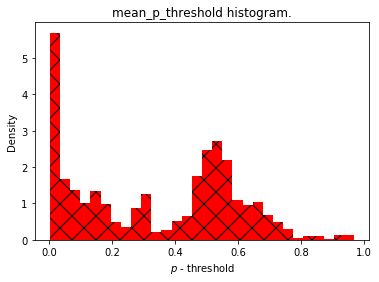

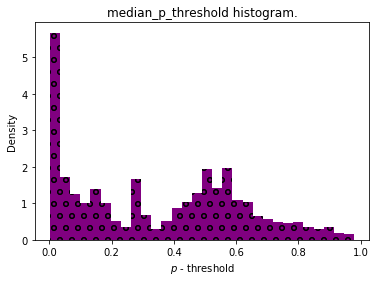

In [18]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Density")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title(str(p_threshold) + " histogram.")
    axes.hist(
        p_thresh_drop_na[p_threshold], bins=30, color=colour, hatch=hatch, density=True
    )
    p_thresh_plot.savefig(str(hist_path))


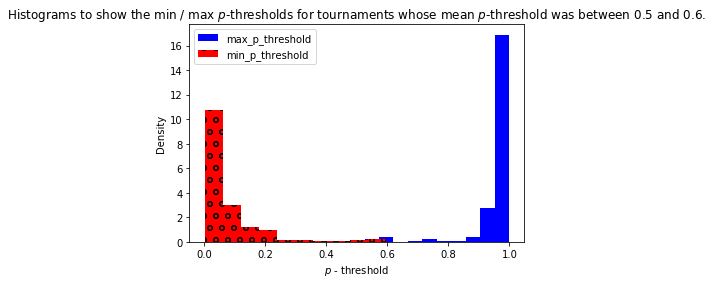

In [19]:
p_mean_middle_data = p_thresh_data[
    (p_thresh_data["mean_p_threshold"] <= 0.6)
    & (p_thresh_data["mean_p_threshold"] >= 0.5)
]

p_mean_middle_data_plot_path = path_for_images / "p_mean_middle_data_plot.pdf"

p_mean_middle_data_plot = plt.figure()
axes = p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Density")
axes.set_xlabel("$p$ - threshold")
axes.set_title(
    "Histograms to show the min / max $p$-thresholds for tournaments whose mean $p$-threshold was between 0.5 and 0.6."
)
axes.hist(
    p_mean_middle_data["max_p_threshold"],
    bins=10,
    color="blue",
    hatch=" ",
    density=True,
    label="max_p_threshold",
)
axes.hist(
    p_mean_middle_data["min_p_threshold"],
    bins=10,
    color="red",
    hatch="o",
    density=True,
    label="min_p_threshold",
)
axes.legend()
p_mean_middle_data_plot.savefig(str(p_mean_middle_data_plot_path))


In [20]:
random.sample(list(p_mean_middle_data["tournament_player_set"]), 3)


[49, 103, 77]

Looking at the probabilities of the game ending for all the games which are definitely non-degenerate.

In [21]:
p_thresh_data_no_degeneracy = p_thresh_drop_na[p_thresh_drop_na["possible_degeneracy"] == False]
p_thresh_data_no_degeneracy.head()

number_of_players  tournament_player_set  noise  min_p_threshold  \
0                  2                      0    0.0         0.293343   
1                  2                      0    0.1         0.182455   
2                  2                      0    0.2         0.051404   
3                  2                      0    0.3         0.001000   
4                  2                      0    0.4         0.001000   

   mean_p_threshold  median_p_threshold  max_p_threshold  possible_degeneracy  
0          0.293343            0.293343         0.293343                False  
1          0.182455            0.182455         0.182455                False  
2          0.088367            0.091727         0.121970                False  
3          0.001000            0.001000         0.001000                False  
4          0.001000            0.001000         0.001000                False

In [24]:
len(p_thresh_data), len(p_thresh_data_no_degeneracy)


(1754, 748)

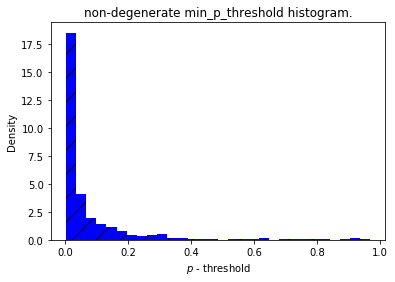

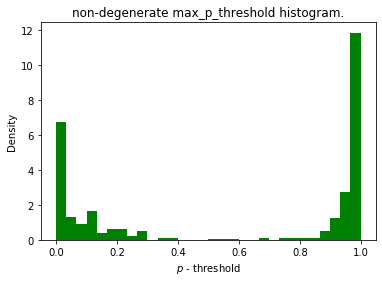

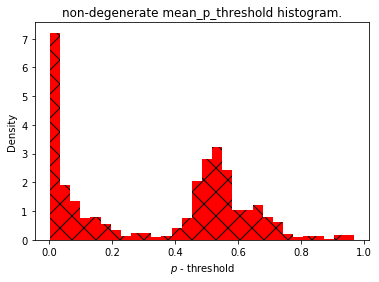

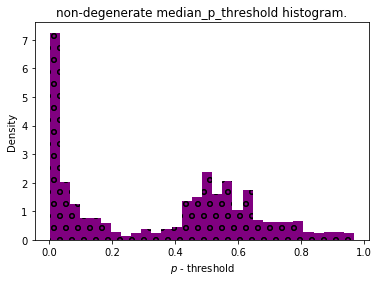

In [25]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
    hist_file_name = "non-degen_" + str(p_threshold) + "_hist.pdf"
    hist_path = path_for_images / hist_file_name
    p_thresh_plot = plt.figure()
    axes = p_thresh_plot.add_subplot(1, 1, 1)
    axes.set_ylabel("Density")
    axes.set_xlabel("$p$ - threshold")
    axes.set_title("non-degenerate " + str(p_threshold) + " histogram.")
    axes.hist(
        p_thresh_data_no_degeneracy[p_threshold],
        bins=30,
        color=colour,
        hatch=hatch,
        density=True,
    )
    p_thresh_plot.savefig(str(hist_path))


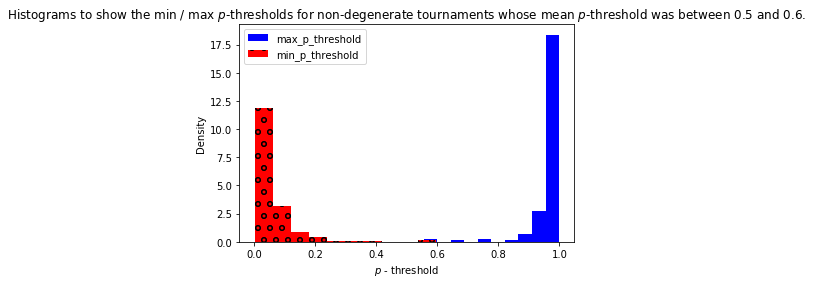

In [26]:
non_degen_p_mean_middle_data = p_thresh_data_no_degeneracy[
    (p_thresh_data_no_degeneracy["mean_p_threshold"] <= 0.6)
    & (p_thresh_data_no_degeneracy["mean_p_threshold"] >= 0.5)
]

non_degen_p_mean_middle_data_plot_path = (
    path_for_images / "non_degen_p_mean_middle_data_plot.pdf"
)

non_degen_p_mean_middle_data_plot = plt.figure()
axes = non_degen_p_mean_middle_data_plot.add_subplot(1, 1, 1)
axes.set_ylabel("Density")
axes.set_xlabel("$p$ - threshold")
axes.set_title(
    "Histograms to show the min / max $p$-thresholds for non-degenerate tournaments whose mean $p$-threshold was between 0.5 and 0.6."
)
axes.hist(
    non_degen_p_mean_middle_data["max_p_threshold"],
    bins=10,
    color="blue",
    hatch=" ",
    density=True,
    label="max_p_threshold",
)
axes.hist(
    non_degen_p_mean_middle_data["min_p_threshold"],
    bins=10,
    color="red",
    hatch="o",
    density=True,
    label="min_p_threshold",
)
axes.legend()
non_degen_p_mean_middle_data_plot.savefig(str(non_degen_p_mean_middle_data_plot_path))


### Effects of different number of players


Dealing with NON_DEGENERATE games

In [27]:
separated_player_dict = {}
for player_number in p_thresh_data_no_degeneracy["number_of_players"]:
    separated_player_dict[str(player_number)] = p_thresh_data_no_degeneracy[
        p_thresh_data_no_degeneracy["number_of_players"] == player_number
    ]
separated_player_dict.keys()


dict_keys(['2', '3', '4', '5', '6', '7', '8'])

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

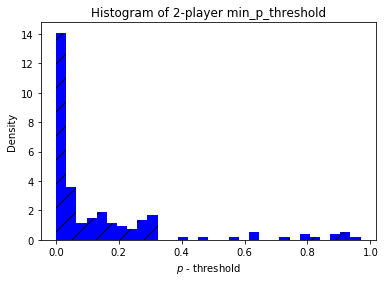

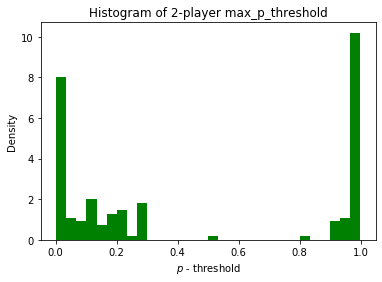

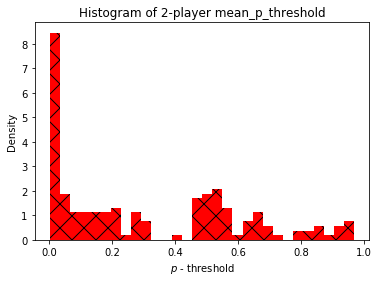

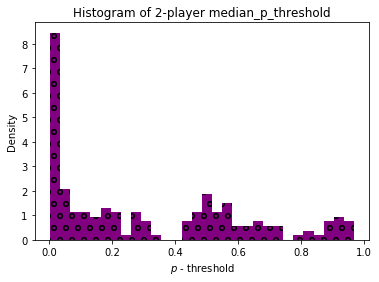

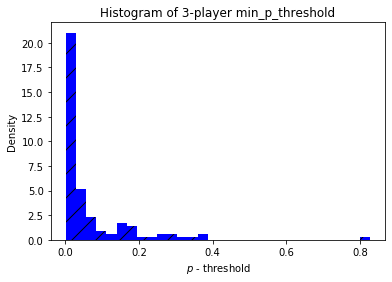

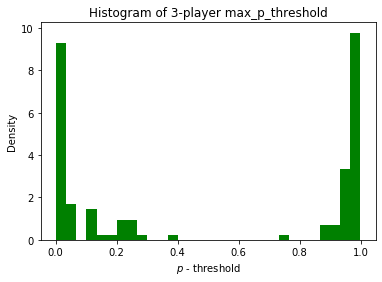

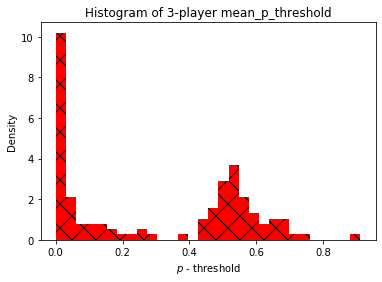

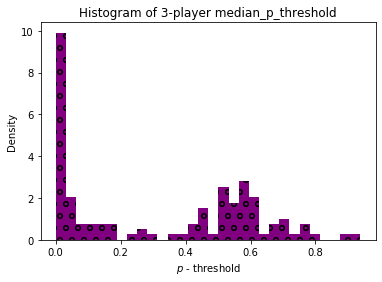

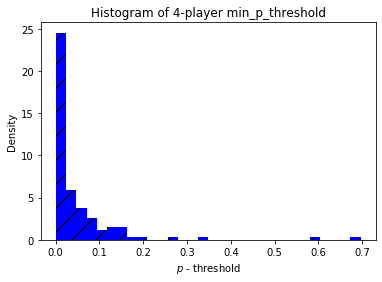

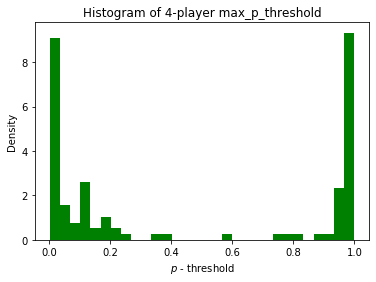

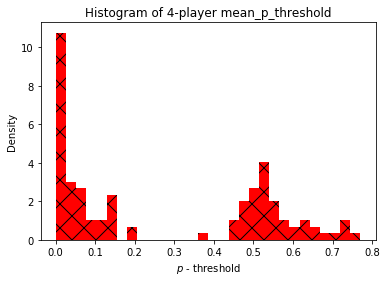

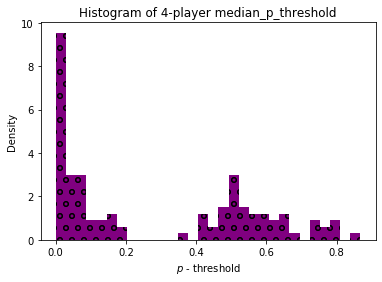

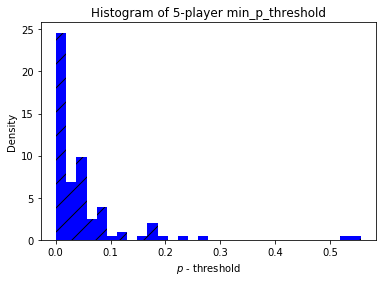

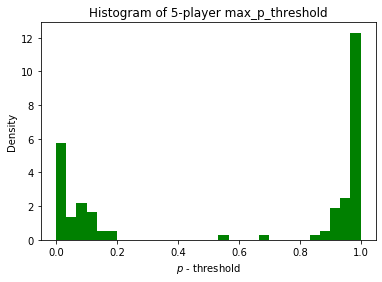

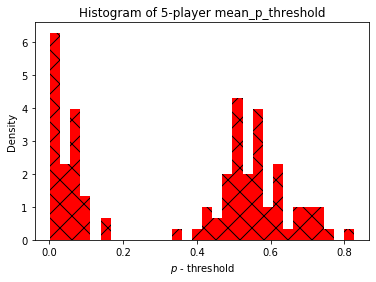

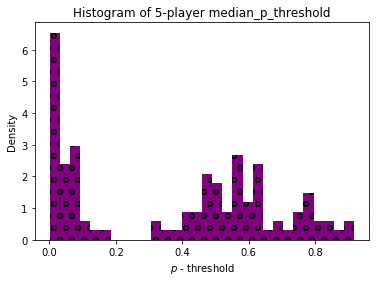

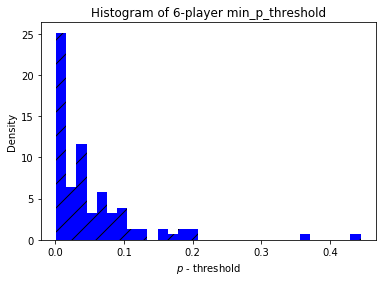

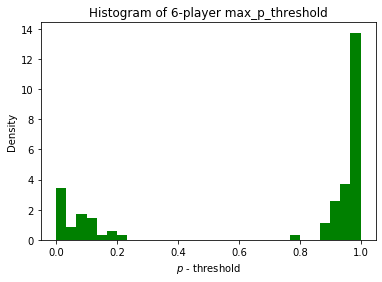

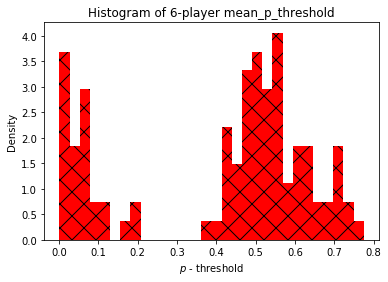

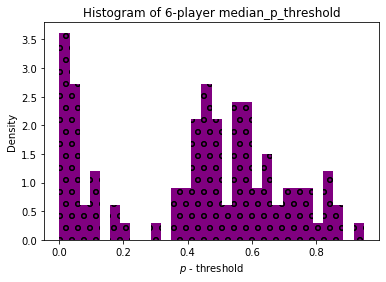

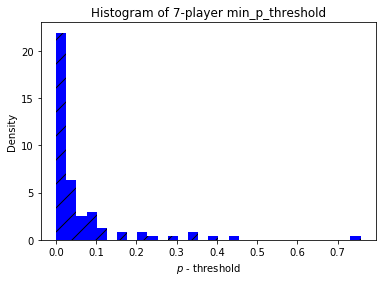

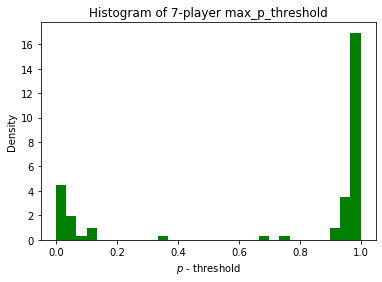

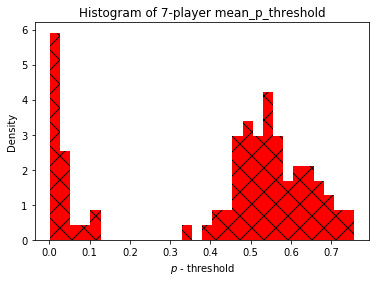

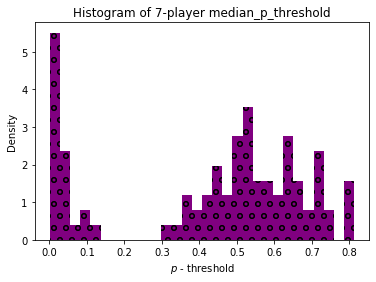

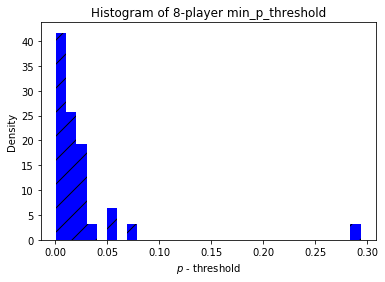

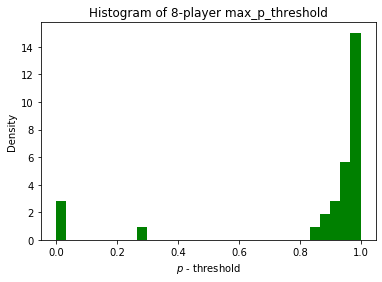

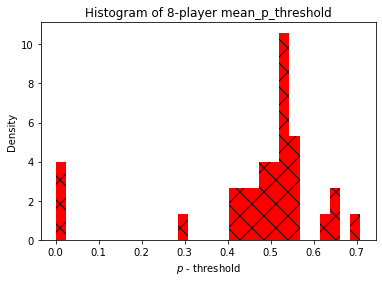

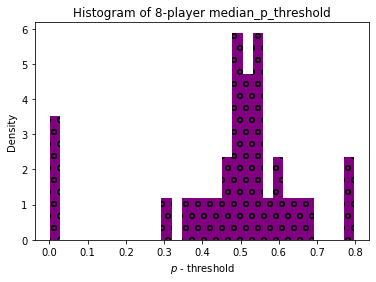

In [28]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for player_number in separated_player_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
        file_name = str(player_number) + "_player_" + str(p_threshold) + "_hist.pdf"
        player_p_thresh_plot_path = path_for_images / file_name
        player_p_thresh_plot = plt.figure()
        axes = player_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Density")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title(
            "Histogram of " + str(player_number) + "-player " + str(p_threshold)
        )
        axes.hist(
            separated_player_dict[str(player_number)][p_threshold],
            bins=30,
            color=colour,
            hatch=hatch,
            density=True,
        )
        player_p_thresh_plot.savefig(str(player_p_thresh_plot_path))
print("Finished!")


In [29]:
for key in separated_player_dict.keys():
    separated_player_dict[key].index = range(len(separated_player_dict[key]))
separated_player_dict.values()


dict_values([     number_of_players  tournament_player_set  noise  min_p_threshold  \
0                    2                      0    0.0         0.293343   
1                    2                      0    0.1         0.182455   
2                    2                      0    0.2         0.051404   
3                    2                      0    0.3         0.001000   
4                    2                      0    0.4         0.001000   
..                 ...                    ...    ...              ...   
160                  2                     24    0.5         0.041323   
161                  2                     24    0.6         0.152212   
162                  2                     24    0.7         0.101808   
163                  2                     24    0.8         0.142131   
164                  2                     24    0.9         0.263101   

     mean_p_threshold  median_p_threshold  max_p_threshold  \
0            0.293343            0.293343       

In [30]:
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold = [], [], [], []
for key in separated_player_dict.keys():
    min_p_threshold.append(separated_player_dict[key]["min_p_threshold"])
    max_p_threshold.append(separated_player_dict[key]["max_p_threshold"])
    mean_p_threshold.append(separated_player_dict[key]["mean_p_threshold"])
    median_p_threshold.append(separated_player_dict[key]["median_p_threshold"])
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold


([0      0.293343
  1      0.182455
  2      0.051404
  3      0.001000
  4      0.001000
           ...   
  160    0.041323
  161    0.152212
  162    0.101808
  163    0.142131
  164    0.263101
  Name: min_p_threshold, Length: 165, dtype: float64, 0      0.011081
  1      0.001000
  2      0.001000
  3      0.011081
  4      0.001000
           ...   
  121    0.182455
  122    0.071566
  123    0.192535
  124    0.162293
  125    0.031242
  Name: min_p_threshold, Length: 126, dtype: float64, 0      0.172374
  1      0.091727
  2      0.021162
  3      0.011081
  4      0.051404
           ...   
  111    0.071566
  112    0.031242
  113    0.001000
  114    0.001000
  115    0.021162
  Name: min_p_threshold, Length: 116, dtype: float64, 0      0.041323
  1      0.041323
  2      0.011081
  3      0.172374
  4      0.011081
           ...   
  105    0.081646
  106    0.021162
  107    0.001000
  108    0.001000
  109    0.021162
  Name: min_p_threshold, Length: 110, dtype: float64

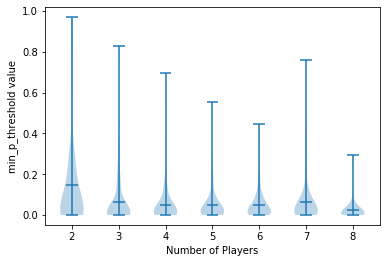

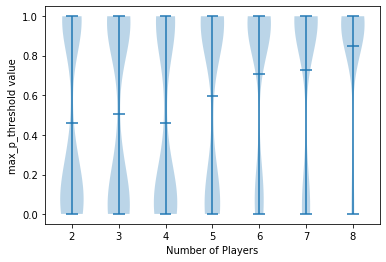

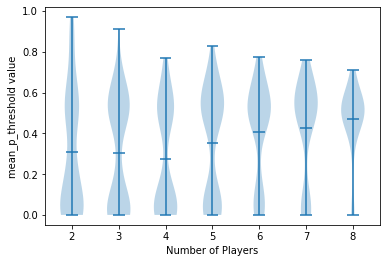

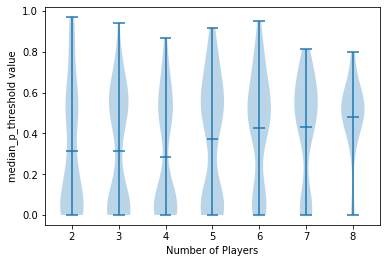

In [31]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
p_thresholds_data = [
    min_p_threshold,
    max_p_threshold,
    mean_p_threshold,
    median_p_threshold,
]
for p_threshold, p_threshold_data in zip(p_thresholds, p_thresholds_data):
    violinplot_file_name = str(p_threshold) + "_player_violinplot.pdf"
    player_p_thresh_violin_path = path_for_images / violinplot_file_name
    player_p_thresh_violinplot = plt.figure()
    axes = player_p_thresh_violinplot.add_subplot(1, 1, 1)
    axes.set_xlabel("Number of Players")
    axes.set_xticks(np.arange(1, len(range(7)) + 1))
    axes.set_xticklabels(list(range(2, 9)))
    axes.set_ylabel(str(p_threshold) + " value")
    axes.violinplot(p_threshold_data, showmeans=True, showmedians=False)
    player_p_thresh_violinplot.savefig(str(player_p_thresh_violin_path))


### Effects of Noise


In [45]:
separated_noise_dict = {}
for amount_of_noise in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    separated_noise_dict[str(amount_of_noise)] = p_thresh_data_no_degeneracy[
        p_thresh_data_no_degeneracy["noise"] == amount_of_noise
    ]
separated_noise_dict.keys()


dict_keys(['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'])

C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
C:\Users\sophi\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this war

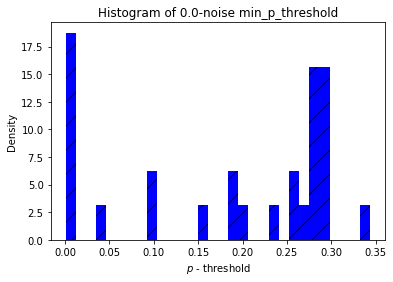

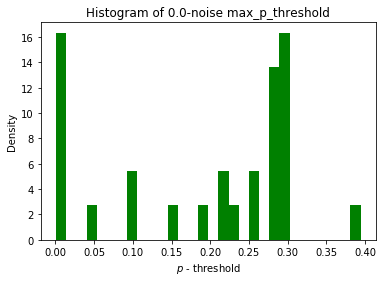

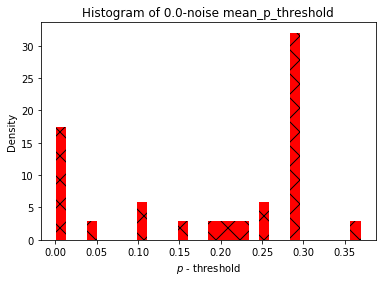

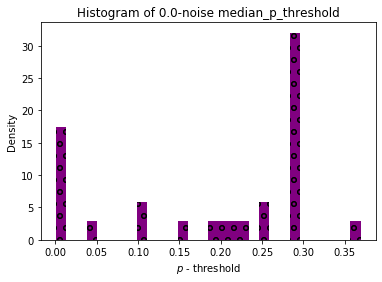

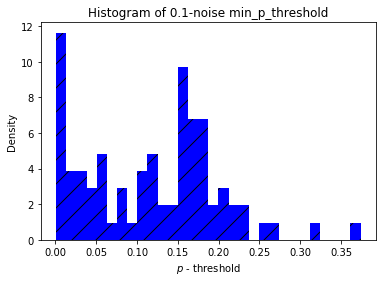

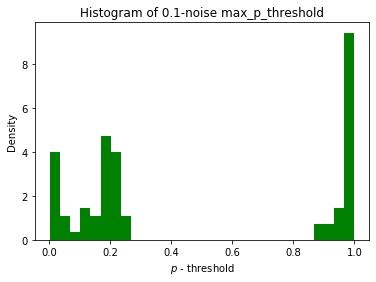

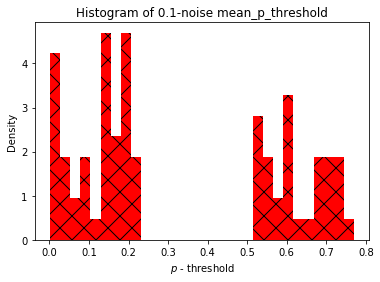

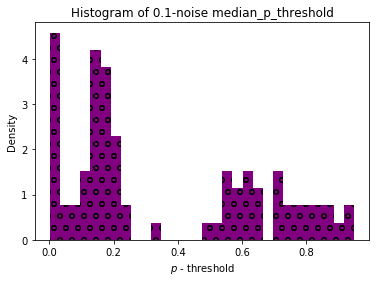

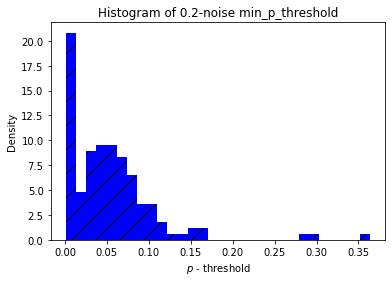

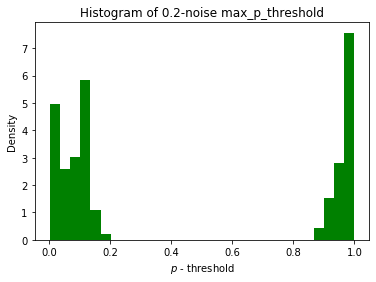

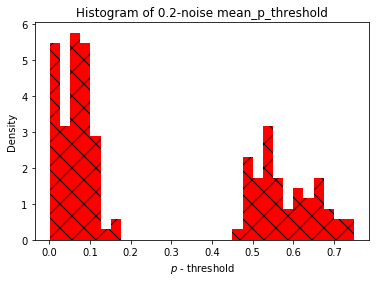

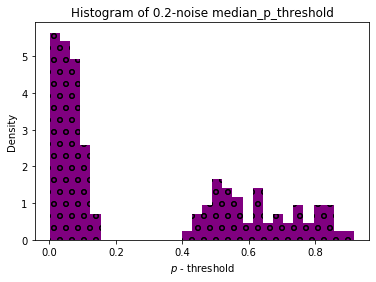

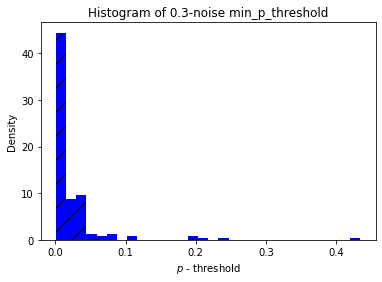

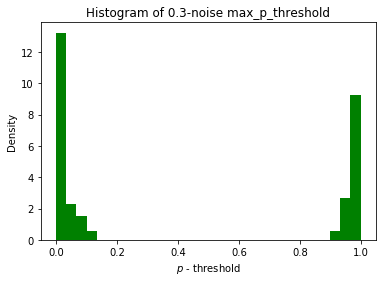

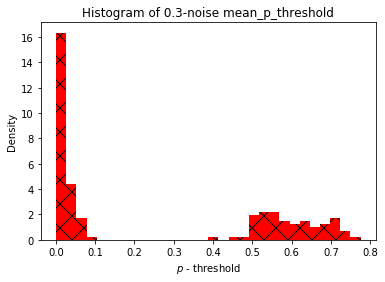

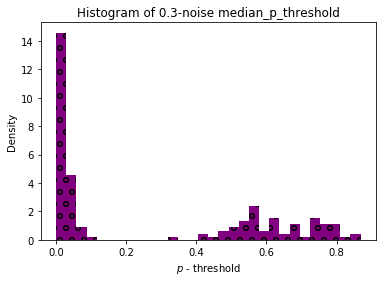

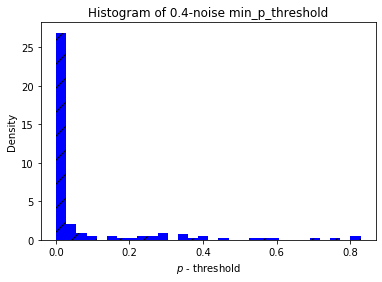

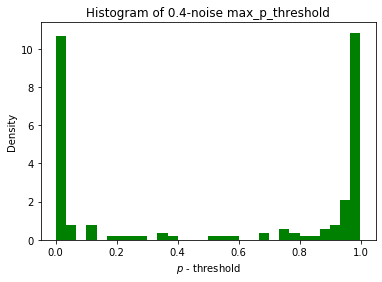

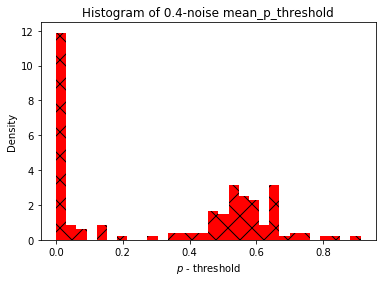

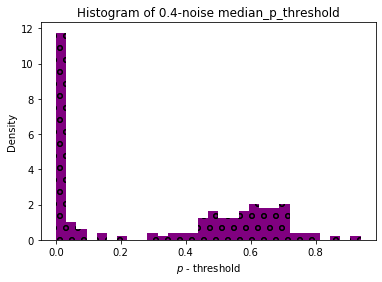

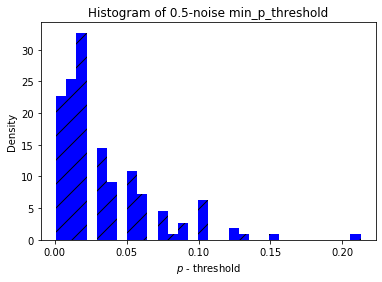

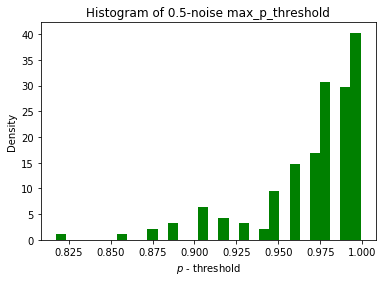

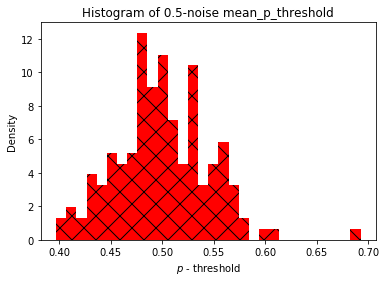

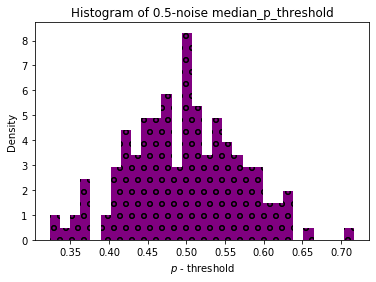

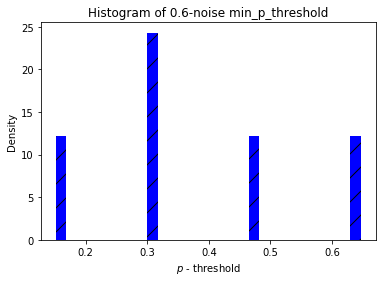

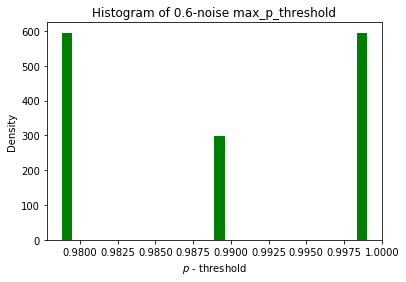

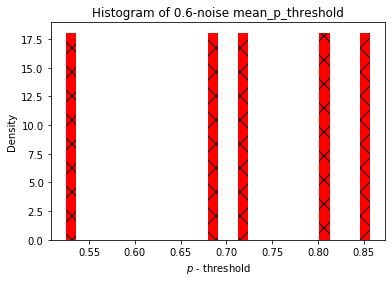

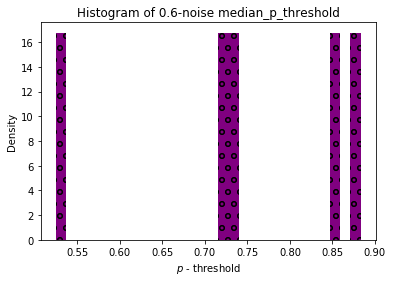

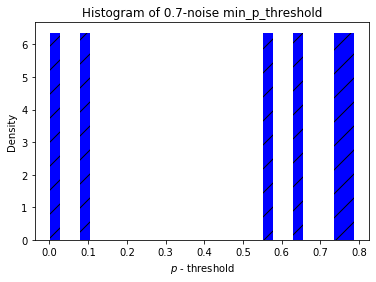

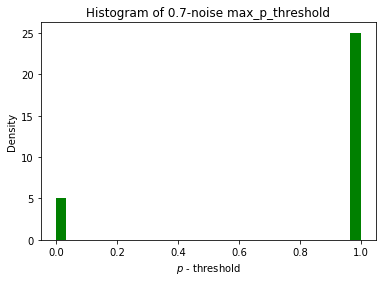

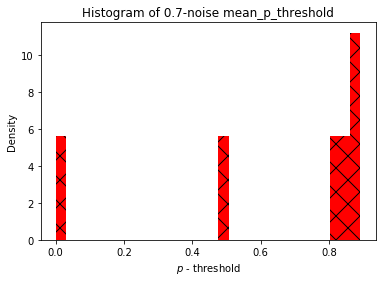

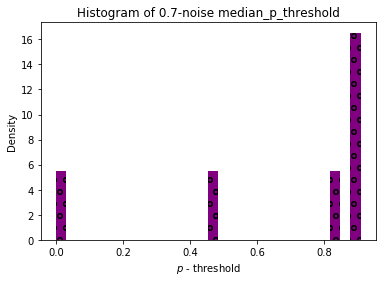

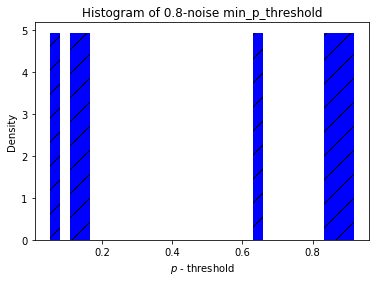

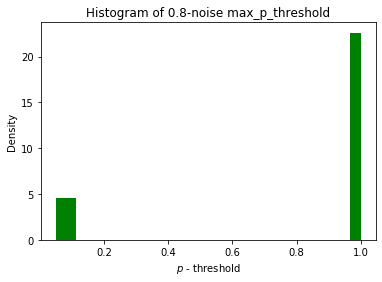

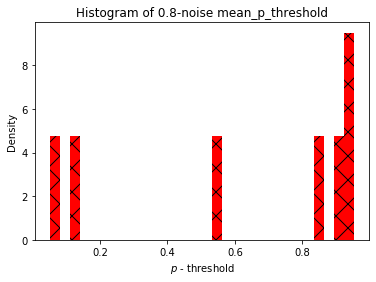

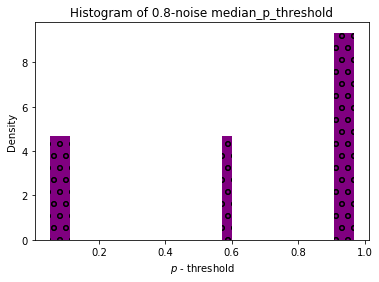

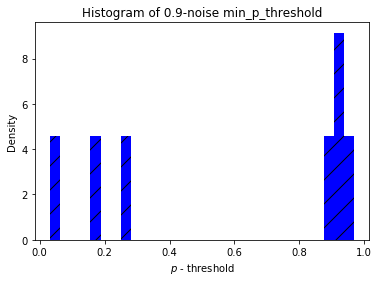

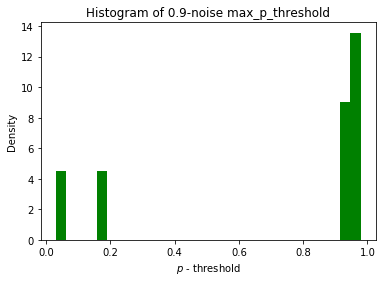

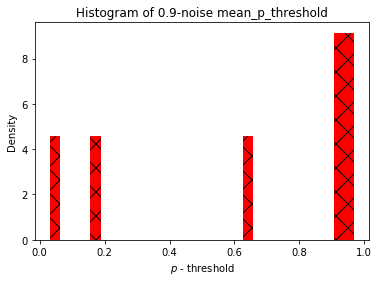

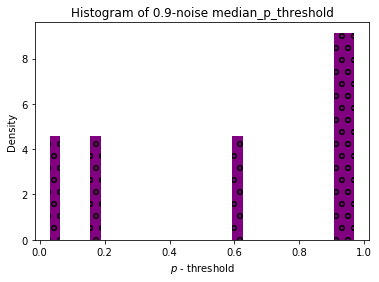

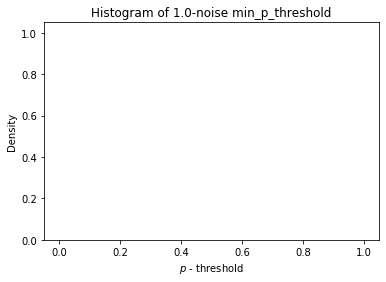

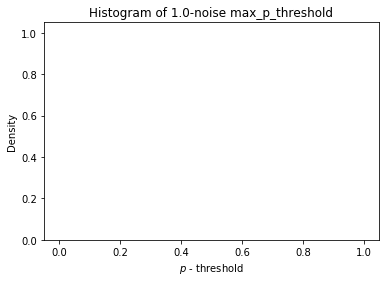

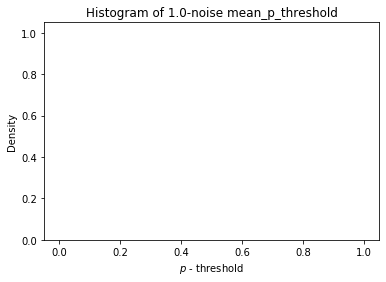

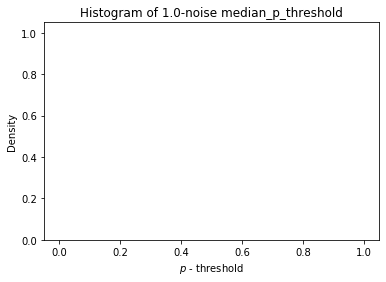

In [46]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
colours = ["blue", "green", "red", "purple"]
hatches = ["/", " ", "x", "o"]
for amount_of_noise in separated_noise_dict.keys():
    for p_threshold, colour, hatch in zip(p_thresholds, colours, hatches):
        file_name = str(amount_of_noise) + "_noise_" + str(p_threshold) + "_hist.pdf"
        noise_p_thresh_plot_path = path_for_images / file_name
        noise_p_thresh_plot = plt.figure()
        axes = noise_p_thresh_plot.add_subplot(1, 1, 1)
        axes.set_ylabel("Density")
        axes.set_xlabel("$p$ - threshold")
        axes.set_title(
            "Histogram of " + str(amount_of_noise) + "-noise " + str(p_threshold)
        )
        axes.hist(
            separated_noise_dict[str(amount_of_noise)][p_threshold],
            bins=30,
            color=colour,
            hatch=hatch,
            density=True,
        )
        noise_p_thresh_plot.savefig(str(noise_p_thresh_plot_path))
print("Finished!")


In [42]:
for key in separated_noise_dict.keys():
    separated_noise_dict[key].index = range(len(separated_noise_dict[key]))
separated_noise_dict.values()


dict_values([    number_of_players  tournament_player_set  noise  min_p_threshold  \
0                   2                      0    0.0         0.293343   
1                   2                      1    0.0         0.001000   
2                   2                      2    0.0         0.192535   
3                   2                      4    0.0         0.283263   
4                   2                      5    0.0         0.293343   
5                   2                      6    0.0         0.283263   
6                   2                      7    0.0         0.273182   
7                   2                      8    0.0         0.152212   
8                   2                      9    0.0         0.001000   
9                   2                     10    0.0         0.001000   
10                  2                     11    0.0         0.283263   
11                  2                     12    0.0         0.293343   
12                  2                     13    0.0

In [43]:
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold = [], [], [], []
for key in separated_noise_dict.keys():
    min_p_threshold.append(separated_noise_dict[key]["min_p_threshold"])
    max_p_threshold.append(separated_noise_dict[key]["max_p_threshold"])
    mean_p_threshold.append(separated_noise_dict[key]["mean_p_threshold"])
    median_p_threshold.append(separated_noise_dict[key]["median_p_threshold"])
min_p_threshold, max_p_threshold, mean_p_threshold, median_p_threshold


([0     0.293343
  1     0.001000
  2     0.192535
  3     0.283263
  4     0.293343
  5     0.283263
  6     0.273182
  7     0.152212
  8     0.001000
  9     0.001000
  10    0.283263
  11    0.293343
  12    0.101808
  13    0.202616
  14    0.283263
  15    0.283263
  16    0.001000
  17    0.293343
  18    0.232859
  19    0.192535
  20    0.101808
  21    0.293343
  22    0.041323
  23    0.253020
  24    0.253020
  25    0.001000
  26    0.343747
  27    0.001000
  Name: min_p_threshold, dtype: float64, 0     0.182455
  1     0.001000
  2     0.142131
  3     0.253020
  4     0.212697
          ...   
  78    0.031242
  79    0.031242
  80    0.172374
  81    0.001000
  82    0.162293
  Name: min_p_threshold, Length: 83, dtype: float64, 0      0.051404
  1      0.001000
  2      0.101808
  3      0.001000
  4      0.091727
           ...   
  134    0.031242
  135    0.071566
  136    0.001000
  137    0.051404
  138    0.021162
  Name: min_p_threshold, Length: 139, dtype: floa

In [44]:
p_thresholds = [
    "min_p_threshold",
    "max_p_threshold",
    "mean_p_threshold",
    "median_p_threshold",
]
p_thresholds_data = [
    min_p_threshold,
    max_p_threshold,
    mean_p_threshold,
    median_p_threshold,
]
for p_threshold, p_threshold_data in zip(p_thresholds, p_thresholds_data):
    violinplot_file_name = str(p_threshold) + "_noise_violinplot.pdf"
    noise_p_thresh_violin_path = path_for_images / violinplot_file_name
    noise_p_thresh_violinplot = plt.figure()
    axes = noise_p_thresh_violinplot.add_subplot(1, 1, 1)
    axes.set_xlabel("Number of Players")
    axes.set_xticks(np.arange(1, len(range(11)) + 1))
    axes.set_xticklabels([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
    axes.set_ylabel(str(p_threshold) + " value")
    axes.violinplot(p_threshold_data, showmeans=True, showmedians=False)
    noise_p_thresh_violinplot.savefig(str(player_p_thresh_violin_path))


IndexError: index out of bounds